                                 Matplotlib: An Introduction

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK etc.

Everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

Matplotlib uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.


Parts of a Figure:

1. Figure: The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes, but to be useful should have at least one.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#creating an empty figure with no axes with pyplot:
fig = plt.figure()
fig.suptitle('No axes on this figure') 

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 432x288 with 0 Axes>

2. Axes: It is the region of the image with the data space. A figure can contain many Axes, but a given Axes object can only be in one Figure. Each Axes has a title (set_title()), an x-label (set_xlabel()), and a y-label set_ylabel()).

3. Axis: These are the number-line-like objects that take care of setting the graph limits and generating the ticks and ticklabels.The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter.

4. Artist: This includes Text objects, Line2D objects, collection objects, Patch objects. When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

Types of inputs to plotting functions: All of plotting functions expect 'array-like' classes such as data objects and np.matrix.

Coding styles:

In [4]:
#Developers for matplotlib have to follow a specific style and guidelines.
#For the pyplot style, the imports will typically be:
import numpy as np
import matplotlib.pyplot as plt

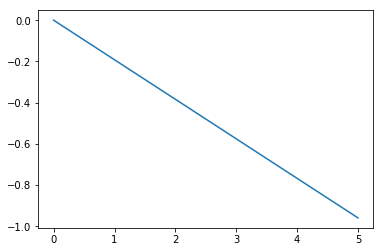

In [5]:
#Now we can use rest  f the functions
x = np.arange(0, 10, 5)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

When same plots are to be used over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

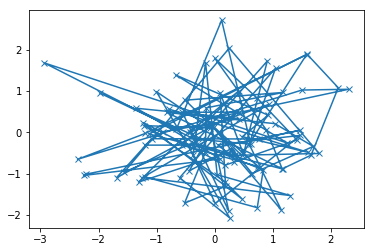

In [6]:
def fun_name(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
fun_name(ax, data1, data2, {'marker': 'x'})

Backend: Matplotlib targets many different use cases and output formats. Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands.
Some people run Jupyter notebooks and draw inline plots for quick data analysis. Others embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Some people use matplotlib in batch scripts to generate postscript images from numerical simulations, and still others run web application servers to dynamically serve up graphs.

"frontend" is the user facing code (the plotting code)whereas the "backend" does all the hard work behind-the-scenes to make the figure. 

There are two types of backends: 
1. user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") 
2. hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").


ipympl: It is the Jupyter widget ecosystem is moving too fast to support directly in Matplotlib.

Splitting lines into smaller chunks: when using the Agg backend we can make use of the agg.path.chunksize rc parameter. This allows us to specify a chunk size, and any lines with greater than that many vertices will be split into multiple lines.

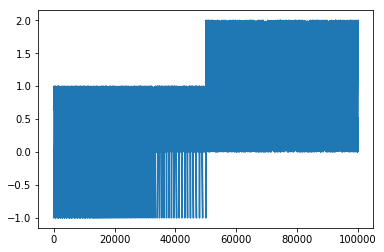

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True
#first display the data without any chunk size restriction
mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()


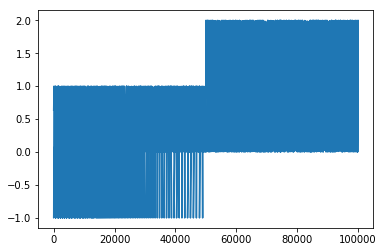

In [10]:
#and then display the same data with a chunk size of 10,000.
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

Legends: Legends can be placed in various positions: A legend can be placed inside or outside the chart and the position can be moved. The legend() method adds the legend to the plot.The default legend behavior for axes attempts to find the location that covers the fewest data points  This can be a very expensive computation if there are lots of data points. 